In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# Importing the dataset
file = pd.read_csv("C:\\Users\\Brielle2983\\OneDrive\\Desktop\\vehicles_us.csv")


In [4]:
# Explore and investigate data
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [5]:
file.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,6/23/2018,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,10/19/2018,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2/7/2019,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,3/22/2019,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,4/2/2019,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,6/20/2018,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,12/27/2018,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,1/7/2019,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,7/16/2018,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2/15/2019,17


Data Cleaning
Will look to remove values 

In [6]:
# List of columns that have missing values to zero and switch it to integer
fillna_and_int = ['is_4wd', 'cylinders', 'model_year', 'odometer']
for i in fillna_and_int:
  file[i] = file[i].fillna(0)
  file[i] = file[i].astype(int)

# Fill the missing paint color with unknown
file["paint_color"] = file["paint_color"].fillna("unknown")

In [7]:
# Function that fills the odometer values that are equal to zero with the value of the odometer from a similar car
def odometer_check(row):
    if row["odometer"] == 0:
        odometer = file.loc[file["model"] == row["model"]].loc[file["model_year"] == row["model_year"]].loc[file["type"] == row["type"]]["odometer"].unique()
        for i in range(len(odometer)):
            if odometer[i] != 0:
                return odometer[i]
    return row["odometer"]

file["odometer"] = file.apply(odometer_check, axis=1)

In [8]:
# Function that finds the most common paint color for each model and fill the missing values with it
def paint_color_check(row):
    if row["paint_color"] == "unknown":
        paint_color = file.loc[file["model"] == row["model"]]["paint_color"].unique()
        for i in range(len(paint_color)):
            if paint_color[i] != "unknown":
                return paint_color[i]
    return row["paint_color"]

file["paint_color"] = file.apply(paint_color_check, axis=1)

In [9]:
# Fill the cylinder by finding the same car model from the same year and taking information from there
def cylinder_check(row):
    if row["cylinders"] == 0:
        cylinder = file.loc[file["model"] == row["model"]].loc[file["model_year"] == row["model_year"]]["cylinders"].unique()
        for i in range(len(cylinder)):
            if cylinder[i] != 0:
                return cylinder[i]
    return row["cylinders"]

file["cylinders"] = file.apply(cylinder_check, axis=1)

In [10]:
# Function that fills the model year values that are equal to zero with the value of the model year from a similar car
def model_year_check(row):
    if row["model_year"] == 0:
        model_year = file.loc[file["model"] == row["model"]].loc[file["type"] == row["type"]]["model_year"].unique()
        for i in range(len(model_year)):
            if model_year[i] != 0:
                return model_year[i]
    return row["model_year"]

file["model_year"] = file.apply(model_year_check, axis=1)

In [11]:
##The manufacture data is combined with the "model_name" column. Will split it so we can access more efficiently.
# Pull the manufacturer from the model column and store it in a new column

file["manufacturer"] = file["model"].str.split(" ", n = 1, expand = True)[0]

In [12]:
# Make a new column "model" from "model_name"

file["model_name"] = file["model"].str.split(" ", n = 1, expand = True)[1]

In [13]:
# Delete the model column
file.drop(columns=["model"], inplace=True)

In [14]:
# Change the date posted values type to datatime 
file["date_posted"] = pd.to_datetime(file["date_posted"])

In [15]:
#Check data
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   condition     51525 non-null  object        
 3   cylinders     51525 non-null  int64         
 4   fuel          51525 non-null  object        
 5   odometer      51525 non-null  int64         
 6   transmission  51525 non-null  object        
 7   type          51525 non-null  object        
 8   paint_color   51525 non-null  object        
 9   is_4wd        51525 non-null  int32         
 10  date_posted   51525 non-null  datetime64[ns]
 11  days_listed   51525 non-null  int64         
 12  manufacturer  51525 non-null  object        
 13  model_name    51525 non-null  object        
dtypes: datetime64[ns](1), int32(1), int64(5), object(7)
memory usage: 5.3+ MB


In [17]:
#export the updated/cleaned dataset
file.to_csv('cleaned_data.csv')

Visualize Data
Looking at data after cleaning and get an idea of how it looks

In [16]:
fig = px.histogram(file, x="price", color="condition", hover_data=file.columns)
fig.show()

In [17]:
# Plot the number of cars for each manufacturer
fig = px.histogram(file, x="manufacturer", title="Number of cars for each manufacturer")
fig.show()

In [18]:
# Plot vehicle type for each manufacturer
fig = px.histogram(file, x="manufacturer", color="type", title="Number of cars for each manufacturer")
fig.show()

Text(0.5, 1.0, 'Price Points on How Many Days Car Is Listed')

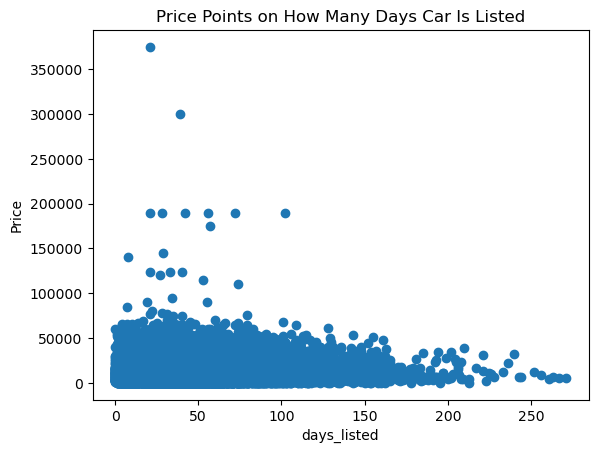

In [19]:
plt.scatter(x='days_listed', y='price', data=file)
plt.xlabel('days_listed')
plt.ylabel('Price')
plt.title('Price Points on How Many Days Car Is Listed')